# Introduction to linear regression

## Batter up

The movie [Moneyball](https://en.wikipedia.org/wiki/Moneyball_(film)) focuses on the "quest for the secret of success in baseball". It follows a low-budget team, the Oakland Athletics, who believed that underused statistics, such as a player's ability to get on base, betterpredict the ability to score runs than typical statistics like home runs, RBIs (runs batted in), and batting average. Obtaining players who excelled in these underused statistics turned out to be much more affordable for the team.

In this lab we'll be looking at data from all 30 Major League Baseball teams and examining the linear relationship between runs scored in a season and a number of other player statistics. Our aim will be to summarize these relationships both graphically and numerically in order to find which variable, if any, helps us best predict a team's runs scored in a season.

## The data

Let's load up the data for the 2011 season.

In [1]:
# for Mac OS users only!
# if you run into any SSL certification issues, 
# you may need to run the following command for a Mac OS installation.
# $/Applications/Python 3.x/Install Certificates.command
import os, ssl
if (not os.environ.get('PYTHONHTTPSVERIFY', '') and
    getattr(ssl, '_create_unverified_context', None)): 
    ssl._create_default_https_context = ssl._create_unverified_context
    
import pandas as pd

mlb11 = pd.read_csv('https://www.openintro.org/stat/data/mlb11.csv')

In addition to runs scored, there are seven traditionally used variables in the data set: at-bats, hits, home runs, batting average, strikeouts, stolen bases, and wins. There are also three newer variables: on-base percentage, slugging percentage, and on-base plus slugging. For the first portion of the analysis we'll consider the seven traditional variables. At the end of the lab, you'll work with the newer variables on your own.

<div class = 'exercise'>
<h4>Exercise 1</h4>
What type of plot would you use to display the relationship between <code>runs</code> and one of the other numerical variables? Plot this relationship using the variable <code>at_bats</code> as the predictor. Does the relationship look linear? If you knew a team's <code>at_bats</code>, would you be comfortable using a linear model to predict the number of runs?
</div>

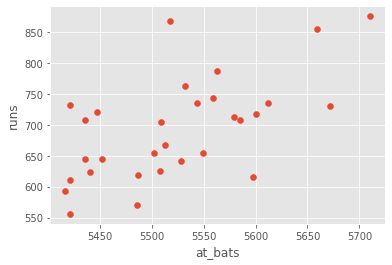

In [2]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')
fig, ax = plt.subplots()
x = mlb11.at_bats
y = mlb11.runs
ax.scatter(x,y)
ax.set_xlabel(x.name)
ax.set_ylabel(y.name)
plt.show()

**Excercise 1 solution**

Linear, moderate to strong, positive relationship between runs and at_bats

If the relationship looks linear, we can quantify the strength of the relationship with the correlation coefficient.

In [3]:
mlb11['runs'].corr(mlb11['at_bats'])

0.6106270467206687

## Sum of squared residuals

Think back to the way that we described the distribution of a single variable. Recall that we discussed characteristics such as center, spread, and shape. It's also useful to be able to describe the relationship of two numerical variables, such as `runs` and `at_bats` above.

<div class = 'exercise'>
<h4>Exercise 2</h4>
Looking at your plot from the previous exercise, describe the relationship between these two variables. Make sure to discuss the form, direction, and strength of the relationship as well as any unusual observations.
</div>

**Excercies 2 solution**

Linear, moderate to strong, positive relationship between runs and at_bats

Recall that the difference between the observed values and the values predicted by the line are called *residuals*. Note that the data set has 30 observations in total, hence there are 30 residuals.

#### ${e}$<sub>i</sub> = ${y}$<sub>i</sub>−$\bar{y}$<sub>i</sub>

To visualize the residuals of a linear regression, we can use `residplot()` function from `seaborn`:

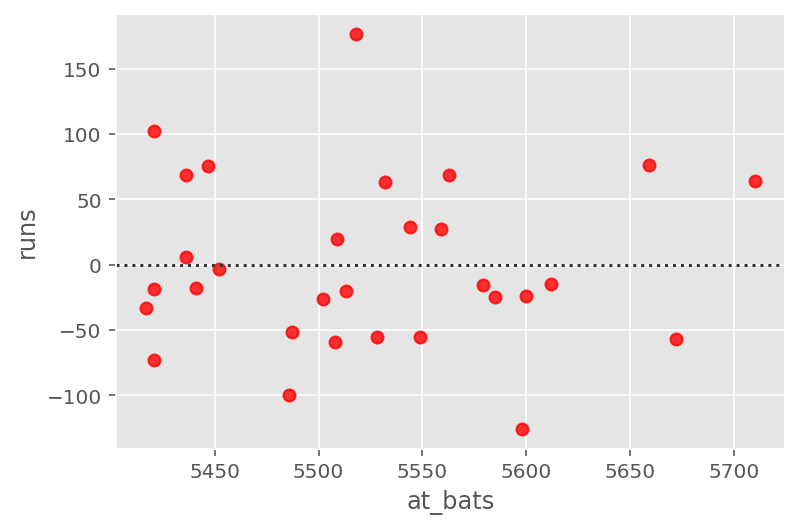

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use('ggplot')
# plt.rcParams['figure.figsize'] = (10,5)

sns.residplot(mlb11['at_bats'], mlb11['runs'], color = 'red')
plt.show();

## The linear model

In order to determine the best fit line we can use `statsmodel', a very useful module for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration.

In [5]:
import statsmodels.api as sm

formula_string = "runs ~ at_bats"

model = sm.formula.ols(formula = formula_string, data = mlb11)
model_fitted = model.fit()

print(model_fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                   runs   R-squared:                       0.373
Model:                            OLS   Adj. R-squared:                  0.350
Method:                 Least Squares   F-statistic:                     16.65
Date:                Wed, 04 Mar 2020   Prob (F-statistic):           0.000339
Time:                        15:36:49   Log-Likelihood:                -167.44
No. Observations:                  30   AIC:                             338.9
Df Residuals:                      28   BIC:                             341.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2789.2429    853.696     -3.267      0.0

Let's print the intercept and slope values.

In [6]:
print('Intercept =', model_fitted.params[0])
print('Slope =', model_fitted.params[1])

Intercept = -2789.242885442255
Slope = 0.6305499928382827


Knowing the intercept and slope, we can write down the least squares regression line for the linear model:

#### ${y}$ = - 2789.2429 + 0.6305 x ${atbats}$

One last piece of information we will discuss from the summary output is the Multiple R-squared, or more simply, ${R}$<sup>2</sup>. The ${R}$<sup>2</sup> value represents the proportion of variability in the response variable that is explained by the explanatory variable. For this model, 37.3% of the variability in runs is explained by at-bats.

In [7]:
print('R-squared =', model_fitted.rsquared)

R-squared = 0.37286539018680676


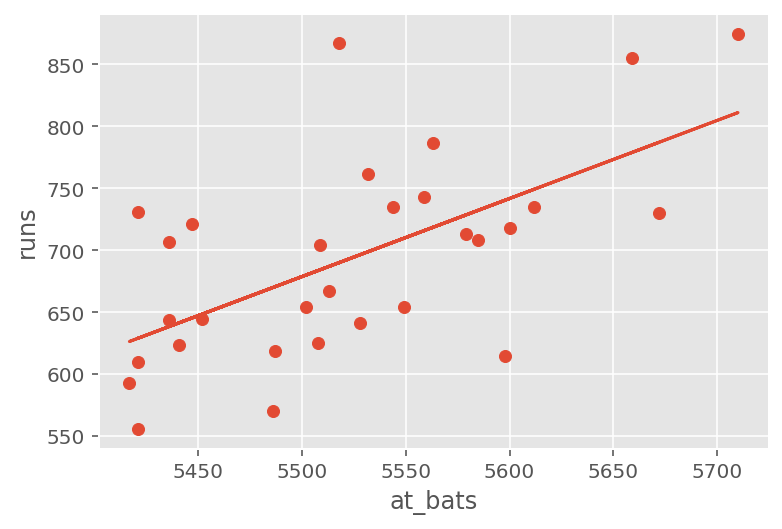

In [8]:
import numpy as np
x = mlb11.at_bats
y = mlb11.runs

slope, intercept = np.polyfit(x, y, 1)
y_est = intercept + slope*x
fig, ax = plt.subplots()
ax.scatter(x, y)
ax.plot(x, y_est)
ax.set_xlabel(x.name)
ax.set_ylabel(y.name)
plt.show()

In [9]:
import scipy
r2 = (scipy.stats.linregress(x,y).rvalue)**2
r2

0.3728653901868057

In [10]:
x = mlb11.at_bats
y = mlb11.runs
slope, intercept = np.polyfit(x, y, 1)

y_est = intercept + slope*x

residuals = y - y_est

# R-squared = 1 - (variability in residuals/variability in outcome)
# variability in residuals/variability in outcome --> how much variability remains after applying the model
# How much of the variability in the data is explained by the model (fit)?
r_sqr = 1-np.var(residuals)/np.var(y)
r_sqr

0.3728653901868051

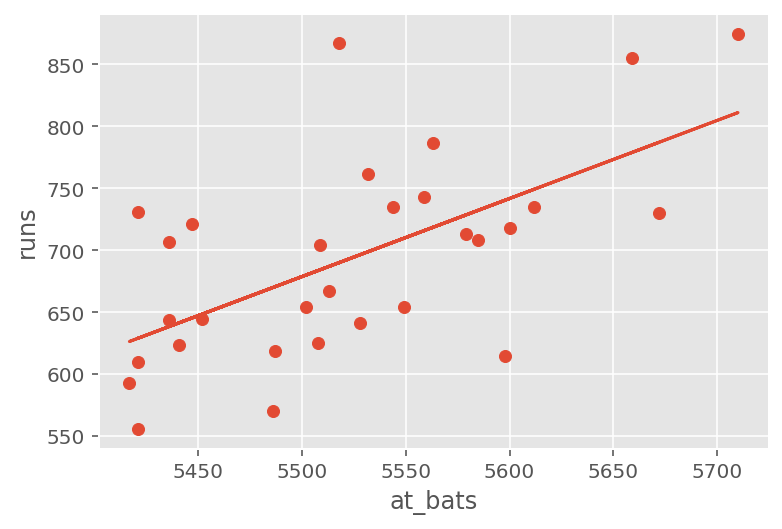

In [11]:
x = mlb11.at_bats
y = mlb11.runs

model = np.polyfit(x,y,1)
y_est = np.polyval(model, x)
fig, ax = plt.subplots()
ax.scatter(x, y)
ax.plot(x, y_est)
ax.set_xlabel(x.name)
ax.set_ylabel(y.name)
plt.show()

<div class = 'exercise'>
<h4>Exercise 3</h4>
    Fit a new model that uses <code>homeruns</code> to predict <code>runs</code>. Using the estimates from the Python output, write the equation of the regression line. What does the slope tell us in the context of the relationship between success of a team and its home runs?
</div>

In [12]:
x = mlb11.homeruns
y = mlb11.runs

formula_string = 'runs ~ homeruns'
model = sm.formula.ols(formula=formula_string, data=mlb11)
model_fitted = model.fit()
print(model_fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                   runs   R-squared:                       0.627
Model:                            OLS   Adj. R-squared:                  0.613
Method:                 Least Squares   F-statistic:                     46.98
Date:                Wed, 04 Mar 2020   Prob (F-statistic):           1.90e-07
Time:                        15:36:50   Log-Likelihood:                -159.66
No. Observations:                  30   AIC:                             323.3
Df Residuals:                      28   BIC:                             326.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    415.2389     41.678      9.963      0.0

y = 415.2 + 1.8 × homeruns

## Prediction and prediction errors

Just as we used the mean and standard deviation to summarize a single variable, we can summarize the relationship between these two variables by finding the line that best follows their association. Let's plot `at_bats` and `runs` on a scatter plot.

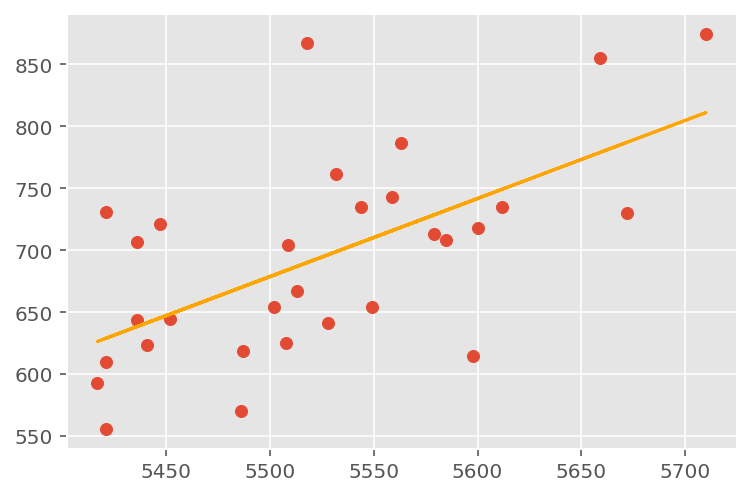

In [13]:
x = mlb11['at_bats']
y = mlb11['runs']

model = sm.formula.ols(formula="runs ~ at_bats", data=mlb11)
model_fitted = model.fit()
y_pred = model_fitted.predict(x)

plt.scatter(mlb11['at_bats'], mlb11['runs'])
plt.plot(x, y_pred, color = 'orange')
plt.show()

<div class = 'exercise'>
<h4>Exercise 4</h4>
If a team manager saw the least squares regression line and not the actual data, how many runs would he or she predict for a team with 5,578 at-bats? Is this an overestimate or an underestimate, and by how much? In other words, what is the residual for this prediction?
</div>

y = -2789.2429 + 0.6305 × at_bats

y = 728

In this case probably overestimated (predicted value is higher then actual data).

## Model diagnostics

To assess whether the linear model is reliable, we need to check for (1) linearity, (2) nearly normal residuals, and (3) constant variability.

*Linearity*: You already checked if the relationship between runs and at-bats is linear using a scatterplot. We should also verify this condition with a plot of the residuals vs. at-bats.

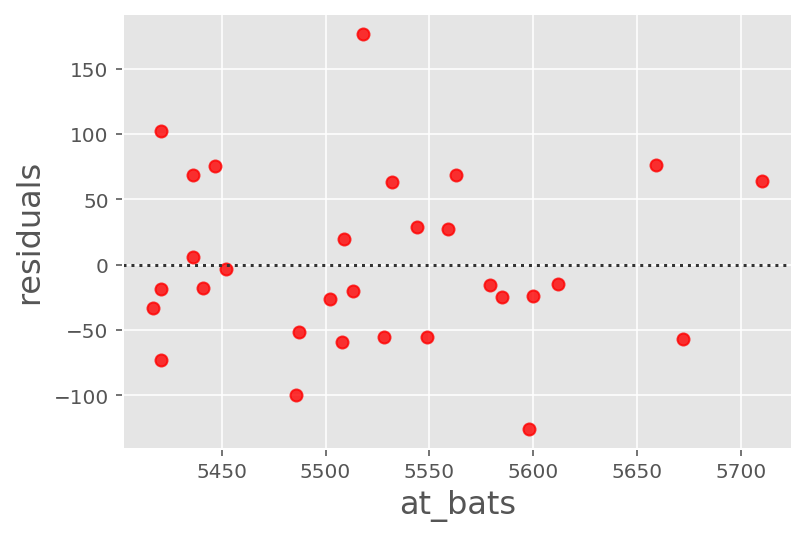

In [14]:
import seaborn as sns
sns.residplot(x, y, color = 'red')
plt.xlabel('at_bats', fontsize = 16)
plt.ylabel('residuals', fontsize = 16)
plt.show();

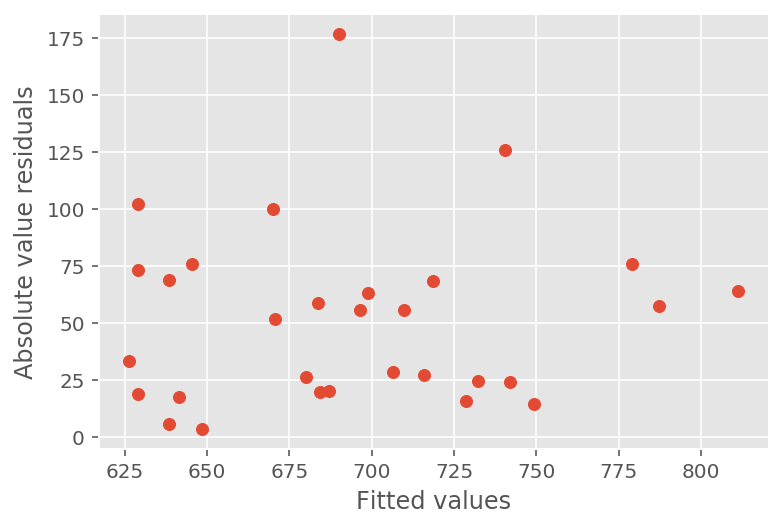

In [15]:
x = mlb11['at_bats']
y = mlb11['runs']

model = sm.formula.ols(formula="runs ~ at_bats", data=mlb11)
model_fitted = model.fit()
y_pred = model_fitted.predict(x)

fig, ax = plt.subplots()
residuals = abs(y - y_pred)
ax.scatter(y_pred, residuals)
ax.set_ylabel('Absolute value residuals')
ax.set_xlabel('Fitted values')
plt.show()

<div class = 'exercise'>
<h4>Exercise 5</h4>
Is there any apparent pattern in the residuals plot? What does this indicate about the linearity of the relationship between runs and at-bats?
</div>

*Nearly normal residuals*: To check this condition, we can look at a histogram.

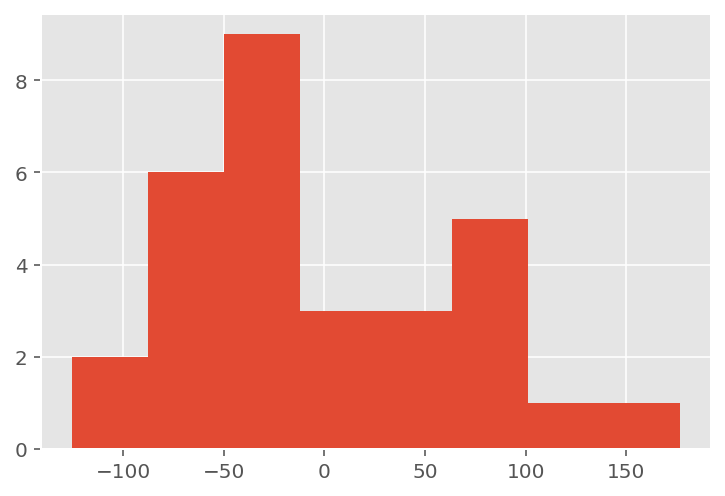

In [16]:
residuals = (y - y_pred)
plt.hist(residuals, bins = 8)
plt.show();

or a normal probability plot of the residuals.

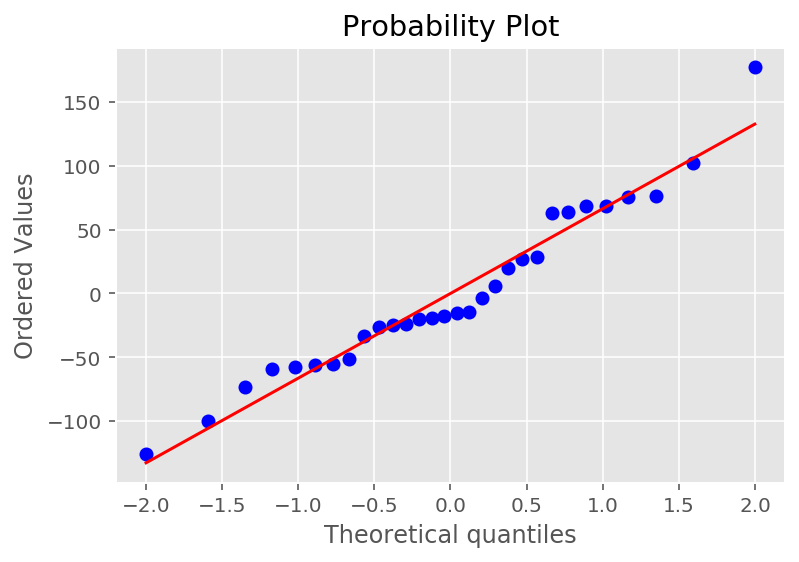

In [17]:
from scipy.stats import probplot
probplot(residuals, plot = plt)
plt.show(); 

<div class = 'exercise'>
<h4>Exercise 6</h4>
Based on the histogram and the normal probability plot, does the nearly normal residuals condition appear to be met?</div>

*Constant variability*:

<div class = 'exercise'>
<h4>Exercise 7</h4>
Based on the plot in (1), does the constant variability condition appear to be met?
    </div>

---
## On Your Own

<ol>
    <li>Choose another traditional variable from <code>mlb11</code> that you think might be a good predictor of <code>runs</code>. Produce a scatterplot of the two variables and fit a linear model. At a glance, does there seem to be a linear relationship?</li><br>
    <li>How does this relationship compare to the relationship between <code>runs</code> and <code>at_bats</code>? Use the R squared values from the two model summaries to compare. Does your variable seem to predict <code>runs</code> better than <code>at_bats</code>? How can you tell?</li><br>
    <li>Now that you can summarize the linear relationship between two variables, investigate the relationships between <code>runs</code> and each of the other five traditional variables. Which variable best predicts <code>runs</code>? Support your conclusion using the graphical and numerical methods we've discussed (for the sake of conciseness, only include output for the best variable, not all five).</li><br>
    <li>Now examine the three newer variables. These are the statistics used by the author of <i>Moneyball</i> to predict a teams success. In general, are they more or less effective at predicting runs that the old variables? Explain using appropriate graphical and numerical evidence. Of all ten variables we've analyzed, which seems to be the best predictor of <code>runs</code>? Using the limited (or not so limited) information you know about these baseball statistics, does your result make sense?</li><br>
    <li>Check the model diagnostics for the regression model with the variable you decided was the best predictor for <code>runs</code></li>
</ol>

<div class = "license">
This lab was adapted by Vural Aksakalli and Imran Ture from OpenIntro by Andrew Bray and Mine Çetinkaya-Rundel.
</div>

***
www.featureranking.com